# The Effect of Different Growth Scenarios on Adjustment Targets

This file uses the European Commission's DSA model to assess effects of German potential growth scenarios on fiscal adjustment needs under the new EU fiscal framework.

Scenarios assume a linear increase in growth effects over a ten year period following the 4-year adjustment period, i.e. a total growth effect of 1 percentage point will lead mean an increase of potential growth by 0.1 in 2029, by 0.2 in 2030 etc.

In [ ]:
# Set autoreleoad
%load_ext autoreload
%autoreload 2

# Import libraries and modules
import sys
import os
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.3f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

# Import DSA model class and stochastic subclass
sys.path.append(os.path.abspath('..'))
from classes import StochasticDsaModel as DSA
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# initialize results_dict
results_dict = {}

# loop through rg increases achieved by 2038 between 0 and 3 percent
for target_rg_effect in np.linspace(0, 2, 21):

    # rg effect increases linearly each year
    rg_effect_steps = np.linspace(0, target_rg_effect, 15)

    # initialize DSA model and adjust potential GDP growth for each year following 2028
    model = dsa('DEU', adjustment_period=4)

    for t, y in enumerate(range(model.start_year, model.end_year)):
        # linear increase in rg effect from 2025 to 2038, constant after effect after
        if t in range(1,16):
            model.rg_pot[t] += rg_effect_steps[t-1]
            model.rg[t] += rg_effect_steps[t-1]
        if t >= 16:
            model.rg_pot[t] += target_rg_effect
            model.rg[t] += target_rg_effect

        # recalculate levels    
        model.rgdp_pot[t] = model.rgdp_pot[t - 1] * (1 + model.rg_pot[t] / 100)
        model.rgdp[t] = model.rgdp[t - 1] * (1 + model.rg[t] / 100)
    
    # adjust baselines
    model.rg_pot_bl = model.rg_pot.copy()
    model.rg_bl = model.rg.copy()
    model.rgdp_pot_bl = model.rgdp_pot.copy()
    model.rgdp_bl = model.rgdp.copy()

    # reproject GDP
    model._project_gdp()

    # calculate adjustment requirements and save results
    model.find_spb_binding()
    results_dict[target_rg_effect] = model.spb_target_dict

                  Model Params                              SPB Targets        
================================================     ==========================
country                                      DEU     main_adjustment      0.172
adjustment period                              4     lower_spb            0.584
adjustment start                            2025     financial_stress     0.211
shock frequency                        quarterly     adverse_r_g          0.568
stochastic period                      2029-2034     deficit_reduction   -0.481
estimation                                normal     stochastic         -10.557
bond level data                            False     binding              0.584
safeguards         EDP, debt, deficit_resilience                               
================================================     ==========================

                                 Binding Params                                
spb_steps                              

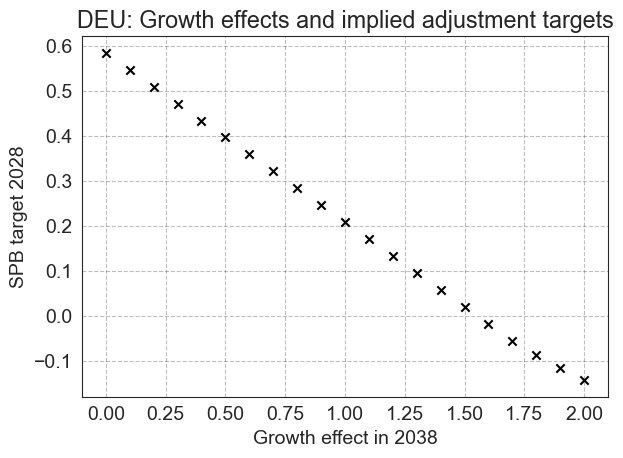

In [6]:
# Create a scatter plot of cumulative growth effect and binding SPB targets
fig, ax = plt.subplots()
for total_rg_effect, spb_target_dict in results_dict.items():
    ax.scatter(total_rg_effect, spb_target_dict['binding'], color='black', marker='x')
ax.set_xlabel('Growth effect in 2038')
ax.set_ylabel('SPB target 2028')
ax.set_title(f'{dsa.country}: Growth effects and implied adjustment targets')
plt.tight_layout()

In [7]:
pd.DataFrame(results_dict).T.reset_index(names='total_rg_effect')

,total_rg_effect,main_adjustment,lower_spb,financial_stress,adverse_r_g,deficit_reduction,stochastic,binding,debt_safeguard
0,0.000,0.172,0.584,0.211,0.568,-0.481,-10.557,0.584,NaN
1,0.100,0.134,0.547,0.173,0.531,-0.490,0.297,0.547,NaN
2,0.200,0.096,0.509,0.136,0.493,-0.499,0.273,0.509,NaN
3,0.300,0.058,0.471,0.098,0.456,-0.509,0.241,0.471,NaN
4,0.400,0.020,0.434,0.060,0.418,-0.518,-10.557,0.434,NaN
5,0.500,-0.017,0.396,0.022,0.381,-0.527,-10.557,0.396,NaN
6,0.600,-0.055,0.359,-0.016,0.343,-0.536,0.154,0.359,NaN
7,0.700,-0.093,0.321,-0.053,0.306,-0.545,-10.557,0.321,NaN
8,0.800,-0.131,0.283,-0.091,0.268,-0.554,0.103,0.283,NaN
9,0.900,-0.169,0.246,-0.129,0.231,-0.563,0.062,0.246,NaN
